<Figure size 432x288 with 0 Axes>

Text(1.08,22.0,'22.0')

Text(1.0224137931034483,51.0,'51.0')

Text(0.9611111111111111,60.0,'60.0')

Text(1.0490062111801242,865.0,'865.0')

Text(1.0497496322724,4060.3,'4060.3')

Text(0.8867346938775389,4065.2,'4065.2')

Text(1.0496853119345448,6607.4,'6607.4')

Text(1.049679877072796,9106.44,'9106.44')

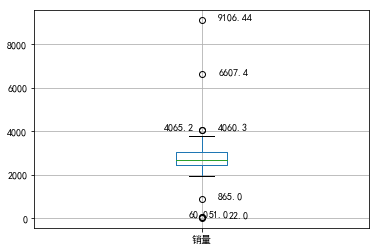

In [1]:
# %load C:\usr\longfengpili\pydata\jupyter\Python数据分析与挖掘实战\chapter3\demo\code\3-1_abnormal_check.py
import pandas as pd

catering_sale = r'C:\usr\longfengpili\pydata\jupyter\Python数据分析与挖掘实战\原书代码数据\chapter3/demo/data/catering_sale.xls' #餐饮数据
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列

import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure() #建立图像
p = data.boxplot(return_type='dict') #画箱线图，直接使用DataFrame的方法
x = p['fliers'][0].get_xdata() # 'flies'即为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort() #从小到大排序，该方法直接改变原对象

#用annotate添加注释
#其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制。
#以下参数都是经过调试的，需要具体问题具体调试。
for i in range(len(x)): 
  if i>0:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
  else:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))

plt.show() #展示箱线图


In [2]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


Text(1.08,22,'22.0')

Text(1.02241,51,'51.0')

Text(0.961111,60,'60.0')

Text(1.04901,865,'865.0')

Text(1.04975,4060.3,'4060.3')

Text(0.886735,4065.2,'4065.2')

Text(1.04969,6607.4,'6607.4')

Text(1.04968,9106.44,'9106.44')

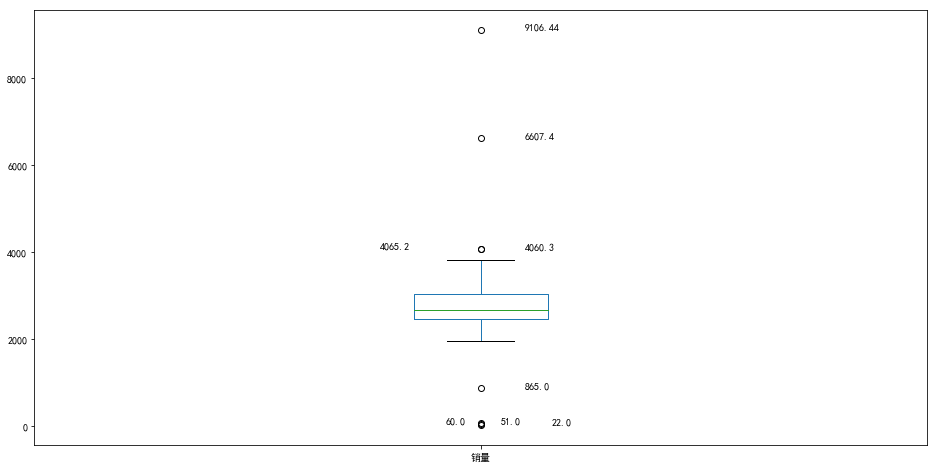

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来显示正常的中文
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
p = data.plot(kind='box',figsize=(16,8),return_type='dict')
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.05-0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.08,y[i]))

In [4]:
data.head()

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1


In [5]:
data['销量'].head()

日期
2015-03-01      51.0
2015-02-28    2618.2
2015-02-27    2608.4
2015-02-26    2651.9
2015-02-25    3442.1
Name: 销量, dtype: float64

Text(2014-11-11 00:00:00,4158.5,'2158.5')

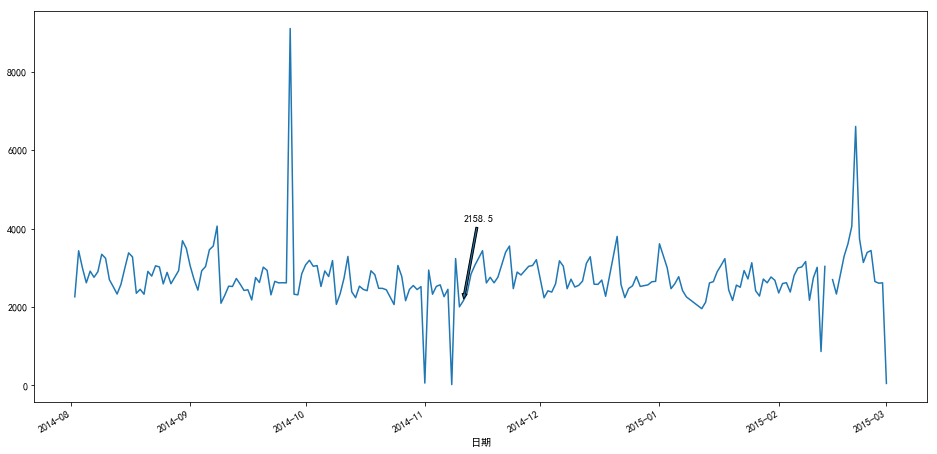

In [2]:
from datetime import datetime
pt = data['销量']
pt.plot(figsize=(16,8))


x = datetime(2014,11,11)
y = 2158.5
plt.annotate(y,xy=(x,y),xytext=(x,y+2000),arrowprops=dict(arrowstyle='simple'))

In [38]:
fish_data = pd.read_excel('./原书代码数据/chapter3/demo/data/catering_fish_congee.xls',names=["日期","销售额"])

In [39]:
fish_data.describe()

,销售额
count,90.000000
mean,1241.333333
std,941.317843
min,45.000000
25%,420.000000
50%,900.000000
75%,1792.500000
max,3960.000000


In [40]:
fish_data.head()

,日期,销售额
0,2014-04-02,900
1,2014-04-03,1290
2,2014-04-04,420
3,2014-04-05,1710
4,2014-04-06,1290


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000156D09E8>]],
      dtype=object)

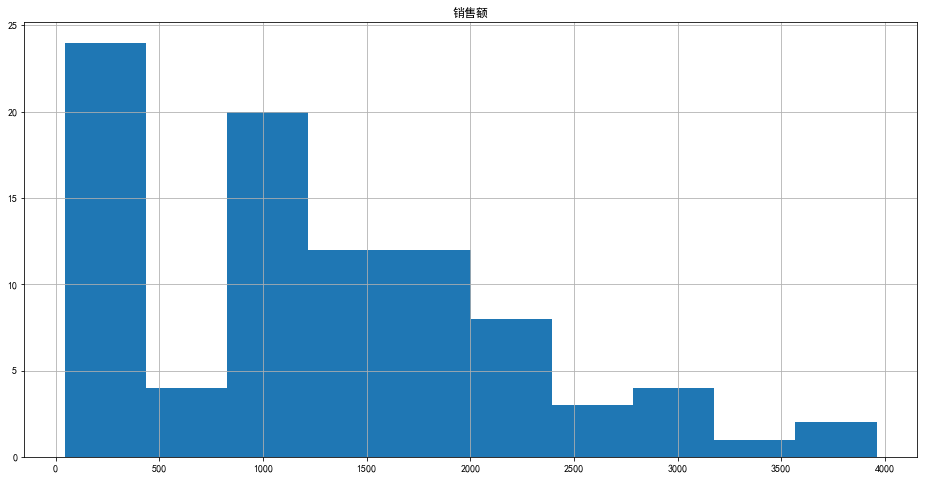

In [66]:
fish_data.hist(column='销售额',bins=10,figsize=(16,8))

In [67]:
data = pd.read_excel('./原书代码数据/chapter3/demo/data/catering_sale.xls',index_col='日期')

In [69]:
data.head()

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1


In [70]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


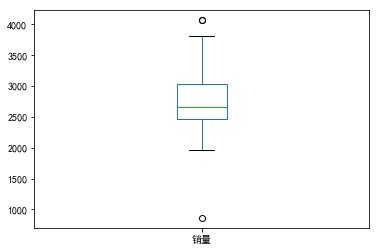

In [74]:
data.plot(kind='box')

In [72]:
data = data[(data.销量 > 400) & (data.销量 < 5000)]

In [75]:
statistics = data.describe()

In [76]:
statistics

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000


In [79]:
statistics.loc['range'] = statistics.loc['max']-statistics.loc['min']
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean']
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%']

In [80]:
statistics

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000
range,3200.200000
var,0.154755


In [4]:
data = pd.read_excel('./原书代码数据/chapter3/demo/data/catering_dish_profit.xls',index_col='菜品名')

In [17]:
data

,菜品ID,盈利
菜品名,,
A1,17148,9173
A2,17154,5729
A3,109,4811
A4,117,3594
A5,17151,3195
A6,14,3026
A7,2868,2378
A8,397,1970
A9,88,1877


In [62]:
    plt.text?

Text(0.5,1.0,'菜品帕累托图')

Text(0,4586.5,'9173')

Text(1,2864.5,'5729')

Text(2,2405.5,'4811')

Text(3,1797.0,'3594')

Text(4,1597.5,'3195')

Text(5,1513.0,'3026')

Text(6,1189.0,'2378')

Text(7,985.0,'1970')

Text(8,938.5,'1877')

Text(9,891.0,'1782')

Text(0,0.5,'盈利：元')

Text(0,0.5,'盈利：累计百分比')

6,A7,0.8500333022512322


Text(6,0.765029972026109,'85.0033%')

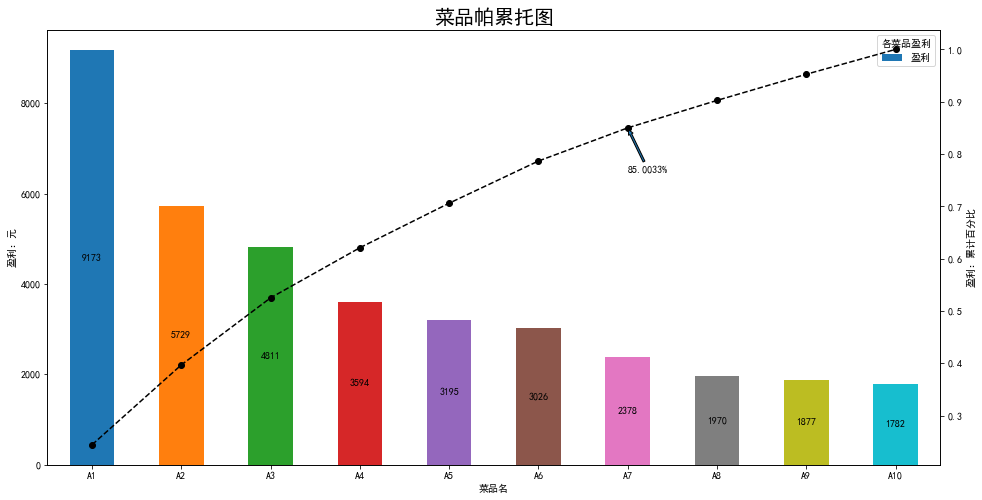

In [66]:
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来显示正常的中文
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.title('菜品帕累托图',size=20)
data['盈利'].plot(kind='bar',figsize=(16,8))
for i in range(len(data)):
    plt.text(x=i,y=data['盈利'][i]*0.5,s='{}'.format(data['盈利'][i]),horizontalalignment='center',verticalalignment='center')
plt.legend(title='各菜品盈利',loc='best')
plt.ylabel('盈利：元')
cumrate = data['盈利'].cumsum()/data['盈利'].sum()
# print(cumrate)
cumrate.plot(kind='line',secondary_y=True,style='ko--')
plt.ylabel('盈利：累计百分比')
for i,value in enumerate(cumrate):
    if value > 0.8 and value < 0.9:
        print('{},{},{}'.format(i,data.index[i],cumrate[i]))
        plt.annotate('{:.4%}'.format(value),xy=(i,cumrate[i]),xytext=(i,cumrate[i]*0.9),arrowprops=dict(arrowstyle='simple'))

In [7]:
data = pd.read_excel('./原书代码数据/chapter3/demo/data/catering_sale_all.xls',date_parser=True,index_col=0)

In [10]:
data.describe()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
count,29.000000,29.000000,29.000000,29.000000,28.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,8.172414,8.551724,9.896552,10.206897,8.535714,8.827586,9.862069,9.689655,9.172414,10.517241
std,3.196750,2.720113,3.004102,4.608837,2.603163,3.000821,4.290556,2.941130,2.829298,4.314599
min,3.000000,5.000000,4.000000,3.000000,4.000000,3.000000,1.000000,5.000000,3.000000,4.000000
25%,6.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9.000000
50%,8.000000,8.000000,11.000000,9.000000,8.000000,9.000000,9.000000,10.000000,10.000000,10.000000
75%,10.000000,10.000000,12.000000,13.000000,10.250000,11.000000,13.000000,12.000000,11.000000,13.000000
max,17.000000,15.000000,14.000000,24.000000,14.000000,15.000000,19.000000,16.000000,14.000000,27.000000


In [15]:
data.head()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
日期,,,,,,,,,,
2015-01-01,17,6,8,24,13.0,13,18,10,10,27
2015-01-02,11,15,14,13,9.0,10,19,13,14,13
2015-01-03,10,8,12,13,8.0,3,7,11,10,9
2015-01-04,9,6,6,3,10.0,9,9,13,14,13
2015-01-05,4,10,13,8,12.0,10,17,11,13,14


In [11]:
data.corr()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,1.000000,0.009206,0.016799,0.455638,0.098085,0.308496,0.204898,0.127448,-0.090276,0.428316
翡翠蒸香茜饺,0.009206,1.000000,0.304434,-0.012279,0.058745,-0.180446,-0.026908,0.062344,0.270276,0.020462
金银蒜汁蒸排骨,0.016799,0.304434,1.000000,0.035135,0.096218,-0.184290,0.187272,0.121543,0.077808,0.029074
乐膳真味鸡,0.455638,-0.012279,0.035135,1.000000,0.016006,0.325462,0.297692,-0.068866,-0.030222,0.421878
蜜汁焗餐包,0.098085,0.058745,0.096218,0.016006,1.000000,0.308454,0.502025,0.155428,0.171005,0.527844
生炒菜心,0.308496,-0.180446,-0.184290,0.325462,0.308454,1.000000,0.369787,0.038233,0.049898,0.122988
铁板酸菜豆腐,0.204898,-0.026908,0.187272,0.297692,0.502025,0.369787,1.000000,0.095543,0.157958,0.567332
香煎韭菜饺,0.127448,0.062344,0.121543,-0.068866,0.155428,0.038233,0.095543,1.000000,0.178336,0.049689
香煎罗卜糕,-0.090276,0.270276,0.077808,-0.030222,0.171005,0.049898,0.157958,0.178336,1.000000,0.088980
原汁原味菜心,0.428316,0.020462,0.029074,0.421878,0.527844,0.122988,0.567332,0.049689,0.088980,1.000000


In [18]:
data.corr(method='spearman')

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,1.000000,-0.041091,0.076075,0.252936,0.077610,0.284248,0.126517,0.108511,-0.124796,0.080487
翡翠蒸香茜饺,-0.041091,1.000000,0.486872,0.025282,0.138780,-0.210647,-0.055828,0.074154,0.227267,0.160247
金银蒜汁蒸排骨,0.076075,0.486872,1.000000,0.092124,0.144932,-0.161763,0.172297,0.114629,0.183649,0.096296
乐膳真味鸡,0.252936,0.025282,0.092124,1.000000,-0.037269,0.226117,0.219495,-0.066069,0.005513,0.129317
蜜汁焗餐包,0.077610,0.138780,0.144932,-0.037269,1.000000,0.294324,0.412218,0.205269,0.222441,0.548356
生炒菜心,0.284248,-0.210647,-0.161763,0.226117,0.294324,1.000000,0.339668,0.112153,0.041850,0.023332
铁板酸菜豆腐,0.126517,-0.055828,0.172297,0.219495,0.412218,0.339668,1.000000,0.006498,0.198571,0.501194
香煎韭菜饺,0.108511,0.074154,0.114629,-0.066069,0.205269,0.112153,0.006498,1.000000,0.126242,0.059178
香煎罗卜糕,-0.124796,0.227267,0.183649,0.005513,0.222441,0.041850,0.198571,0.126242,1.000000,0.074984
原汁原味菜心,0.080487,0.160247,0.096296,0.129317,0.548356,0.023332,0.501194,0.059178,0.074984,1.000000


In [30]:
data.cov()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,10.219212,0.080049,0.161330,6.713054,0.824074,2.959360,2.810345,1.198276,-0.816502,5.907635
翡翠蒸香茜饺,0.080049,7.399015,2.487685,-0.153941,0.423280,-1.472906,-0.314039,0.498768,2.080049,0.240148
金银蒜汁蒸排骨,0.161330,2.487685,9.024631,0.486453,0.760582,-1.661330,2.413793,1.073892,0.661330,0.376847
乐膳真味鸡,6.713054,-0.153941,0.486453,21.241379,0.186508,4.501232,5.886700,-0.933498,-0.394089,8.389163
蜜汁焗餐包,0.824074,0.423280,0.760582,0.186508,6.776455,2.333333,5.572751,1.153439,1.268519,6.035714
生炒菜心,2.959360,-1.472906,-1.661330,4.501232,2.333333,9.004926,4.761084,0.337438,0.423645,1.592365
铁板酸菜豆腐,2.810345,-0.314039,2.413793,5.886700,5.572751,4.761084,18.408867,1.205665,1.917488,10.502463
香煎韭菜饺,1.198276,0.498768,1.073892,-0.933498,1.153439,0.337438,1.205665,8.650246,1.483990,0.630542
香煎罗卜糕,-0.816502,2.080049,0.661330,-0.394089,1.268519,0.423645,1.917488,1.483990,8.004926,1.086207
原汁原味菜心,5.907635,0.240148,0.376847,8.389163,6.035714,1.592365,10.502463,0.630542,1.086207,18.615764


In [42]:
data
data.rolling(4).sum()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
日期,,,,,,,,,,
2015-01-01,17,6,8,24,13.0,13,18,10,10,27
2015-01-02,11,15,14,13,9.0,10,19,13,14,13
2015-01-03,10,8,12,13,8.0,3,7,11,10,9
2015-01-04,9,6,6,3,10.0,9,9,13,14,13
2015-01-05,4,10,13,8,12.0,10,17,11,13,14
2015-01-06,13,10,13,16,8.0,9,12,11,5,9
2015-01-07,9,7,13,8,5.0,7,10,8,10,7
2015-01-08,9,12,13,6,7.0,8,6,12,11,5
2015-01-12,6,8,8,3,NaN,4,5,5,7,10


,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
日期,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,47.0,35.0,40.0,53.0,40.0,35.0,53.0,47.0,48.0,62.0
2015-01-05,34.0,39.0,45.0,37.0,39.0,32.0,52.0,48.0,51.0,49.0
2015-01-06,36.0,34.0,44.0,40.0,38.0,31.0,45.0,46.0,42.0,45.0
2015-01-07,35.0,33.0,45.0,35.0,35.0,35.0,48.0,43.0,42.0,43.0
2015-01-08,35.0,39.0,52.0,38.0,32.0,34.0,45.0,42.0,39.0,35.0
2015-01-12,37.0,37.0,47.0,33.0,NaN,28.0,33.0,36.0,33.0,31.0


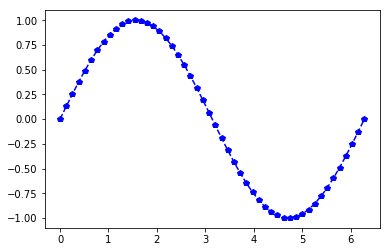

In [45]:
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)
plt.plot(x,y,'bp--')
plt.show()

([<matplotlib.patches.Wedge at 0x19007c18>,
 [Text(-0.2700340253456175,1.06634029519457,'frogs'),
  Text(-1.0045997480410214,0.6563378293500355,'hogs'),
  Text(-0.868054588635404,-0.6756339475996006,'dogs'),
  Text(1.0962429454406837,-0.09083724220568641,'logs')],
 [Text(-0.14729128655215498,0.5816401610152199,'7.9%'),
  Text(-0.5860165196905958,0.3828637337875207,'15.8%'),
  Text(-0.47348432107385663,-0.36852760778160026,'23.7%'),
  Text(0.5979506975131,-0.04954758665764713,'52.6%')])

(-1.1847163595131474,
 1.1124186063165737,
 -1.109577133707243,
 1.1004560675490558)

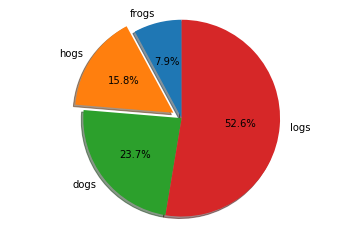

In [58]:
labels = ['frogs','hogs','dogs','logs']
sizes = [15,30,45,100]
explode = (0,0.1,0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal') #显示为圆

In [61]:
error = np.random.randn(10)
y = Series(np.sin(np.arange(10)))

In [62]:
error
y

array([ 0.46610979,  1.68023095, -1.51333154,  1.23687411, -1.19152665,
        1.08417316,  1.41907103,  1.89689009,  0.69575785, -1.06603263])

0    0.000000
1    0.841471
2    0.909297
3    0.141120
4   -0.756802
5   -0.958924
6   -0.279415
7    0.656987
8    0.989358
9    0.412118
dtype: float64

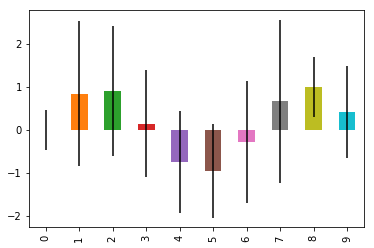

In [66]:
y.plot(kind='bar',yerr=error)